In [1]:
from collections import defaultdict
import awkward as ak
import numba
import numpy as np
import pandas as pd
import h5py
import vector
vector.register_numba()
vector.register_awkward()

import matplotlib.pyplot as plt
#from matplotlib.colors import LogNorm
#import mplhep as hep
#hep.style.use(hep.style.ROOT)

## Plot the scores of the new trainings for the new cuts

In [ ]:
def jet_kin_var_kl(dataset,kinvar,kl):
    mask_kl=dataset['INPUTS']['Event']['kl'][()]==kl

    kin_var_test=dataset['INPUTS']['Jet'][kinvar][()]

    kin_var_test_kl=kin_var_test[mask_kl]

    flat_kin_var_test_kl=ak.flatten(kin_var_test_kl)
    return flat_kin_var_test_kl

pt_kl1_nc=jet_kin_var_kl(df_test_nc,"pt",1)
print(pt_kl1_nc)

## Plotting different kinematical varibales for old and new cuts

In [ ]:
#prefix="/run/user/1000/gvfs/sftp:host=lxplus.cern.ch,user=ramellar/"
filename_test_nc = "/work/mmalucch/out_hh4b/out_spanet_newkl_newJetCuts/output_JetGoodHiggs_train.h5"
filename_test= "/work/mmalucch/out_hh4b/out_spanet/output_JetGoodHiggs_train.h5"

df_test_nc = h5py.File(filename_test_nc,'r')
df_test=h5py.File(filename_test,'r')
# df_pred1 = h5py.File(filename_pred1,'r')
# df_pred2 = h5py.File(filename_pred2,'r')

In [3]:
#tests
df_test_nc.keys()
df_test_nc['INPUTS']['Event']['kl'][()]

#print(len(df_test['INPUTS']['Event']['kl'][()]))


mask_kl1=df_test_nc['INPUTS']['Event']['kl'][()]==1
mask_kl3p5=df_test_nc['INPUTS']['Event']['kl'][()]==3.5

#print(df_test['INPUTS']['Jet'].keys())

pt_test=df_test_nc['INPUTS']['Jet']['pt'][()]
eta_test=df_test_nc['INPUTS']['Jet']['eta'][()]
phi_test=df_test_nc['INPUTS']['Jet']['phi'][()]
btag_test=df_test_nc['INPUTS']['Jet']['btag'][()]

print(len(pt_test))
#print(ak.unflatten(pt_test,ak.ones_like(pt_test)))

pt_test_kl1=pt_test[mask_kl1]
#print(len(pt_test_kl1))
#print(pt_test_kl1)
pt_test_kl3p5=pt_test[mask_kl3p5]
#print(len(pt_test_kl3p5))

# df_test_kl1=df_test[mask_kl1]
# df_test_kl3p5=df_test[mask_kl3p5]

print(df_test_nc['INPUTS']['Event']['kl'][()].shape)
print(pt_test_kl1)
flat_pt_test = ak.flatten(pt_test)
#print(flat_pt_test)
flat_pt_test_kl1=ak.flatten(pt_test_kl1)
print(flat_pt_test_kl1)
flat_pt_test_kl3p5=ak.flatten(pt_test_kl3p5)


1677151
(1677151,)
[[ 65.75    102.75     67.1875   28.40625]
 [ 87.9375  141.125   120.8125   47.375  ]
 [169.      207.5     142.125    43.6875 ]
 ...
 [ 42.4375   88.8125  110.75     67.4375 ]
 [354.5     238.875   143.875   481.5    ]
 [ 93.5625   98.8125  115.8125   46.03125]]
[65.8, 103, 67.2, 28.4, 87.9, 141, 121, 47.4, ... 239, 144, 482, 93.6, 98.8, 116, 46]


In [4]:
mask_kl1=df_test_nc['INPUTS']['Event']['kl'][()]==1
mask_kl3p5=df_test_nc['INPUTS']['Event']['kl'][()]==3.5

pt_test=df_test_nc['INPUTS']['Jet']['pt'][()]
eta_test=df_test_nc['INPUTS']['Jet']['eta'][()]
phi_test=df_test_nc['INPUTS']['Jet']['phi'][()]
btag_test=df_test_nc['INPUTS']['Jet']['btag'][()]

pt_test_kl1=pt_test[mask_kl1]
pt_test_kl3p5=pt_test[mask_kl3p5]

flat_pt_test_kl1=ak.flatten(pt_test_kl1)
flat_pt_test_kl3p5=ak.flatten(pt_test_kl3p5)

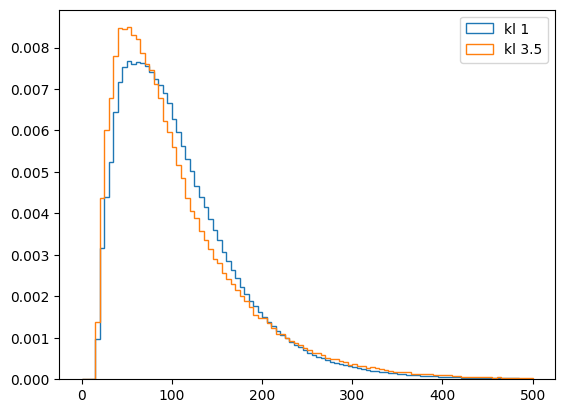

In [5]:
plt.hist(flat_pt_test_kl1,bins=100,range=(0,500),histtype='step',label="kl 1", density=True)
plt.hist(flat_pt_test_kl3p5,bins=100,range=(0,500),histtype='step',label="kl 3.5", density=True)
plt.legend()
plt.show()

In [6]:
def jet_kin_var_kl(dataset,kinvar,kl):
    mask_kl=dataset['INPUTS']['Event']['kl'][()]==kl

    kin_var_test=dataset['INPUTS']['Jet'][kinvar][()]

    kin_var_test_kl=kin_var_test[mask_kl]

    flat_kin_var_test_kl=ak.flatten(kin_var_test_kl)
    return flat_kin_var_test_kl

pt_kl1_nc=jet_kin_var_kl(df_test_nc,"pt",1)
print(pt_kl1_nc)

[65.8, 103, 67.2, 28.4, 87.9, 141, 121, 47.4, ... 239, 144, 482, 93.6, 98.8, 116, 46]


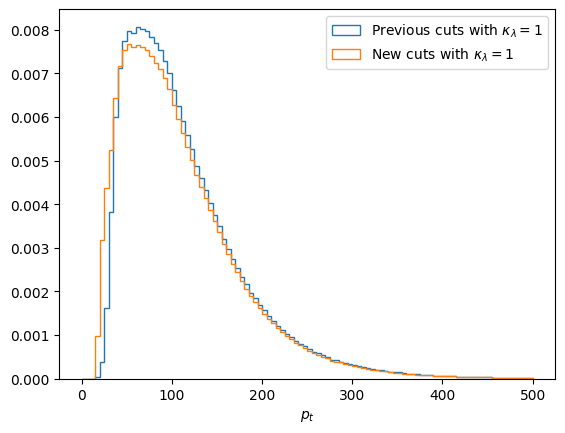

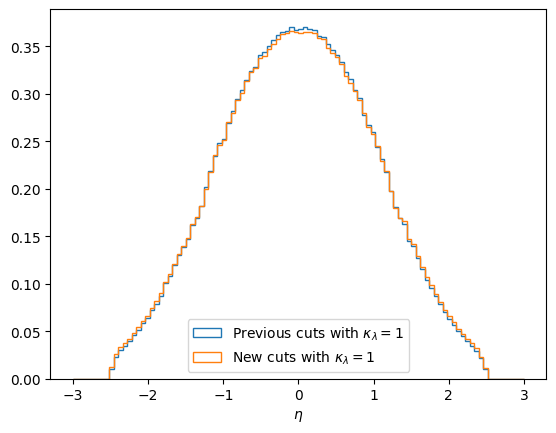

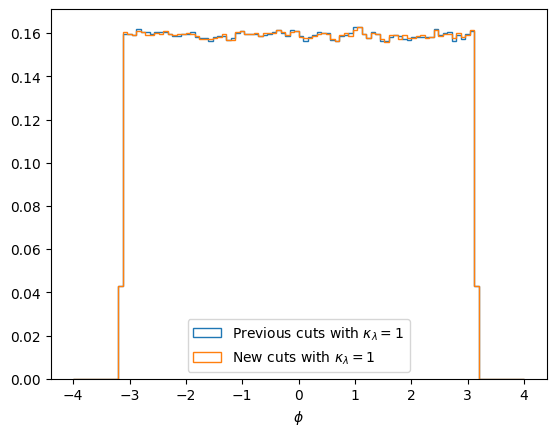

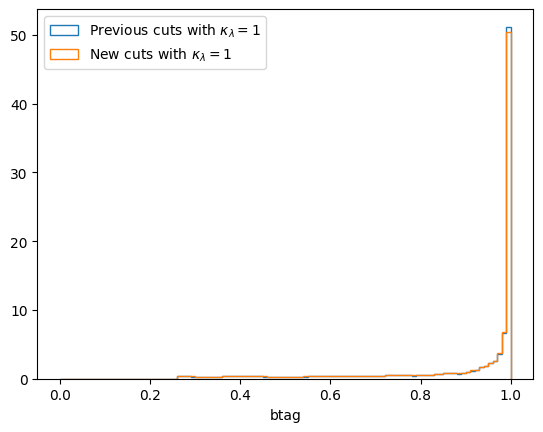

In [7]:
pt_kl1_nc=jet_kin_var_kl(df_test_nc,"pt",1)
eta_kl1_nc=jet_kin_var_kl(df_test_nc,"eta",1)
phi_kl1_nc=jet_kin_var_kl(df_test_nc,"phi",1)
btag_kl1_nc=jet_kin_var_kl(df_test_nc,"btag",1)

pt_kl1=jet_kin_var_kl(df_test,"pt",1)
eta_kl1=jet_kin_var_kl(df_test,"eta",1)
phi_kl1=jet_kin_var_kl(df_test,"phi",1)
btag_kl1=jet_kin_var_kl(df_test,"btag",1)

def plot_kin_var(dataset_1,label_1,dataset_2,label_2,kin_var, bins,range):
    # plt.xscale("log")
    # plt.yscale("log")
    plt.hist(dataset_1,bins,range,histtype='step', density=True,label=f"{label_1}")
    plt.hist(dataset_2,bins,range,histtype='step', density=True, label=f"{label_2}")
    if kin_var=="pt":
        plt.xlabel(f"$p_t$")
    elif kin_var=="eta":
        plt.xlabel(f"$\eta$")
    elif kin_var=="phi":
        plt.xlabel(f"$\phi$")
    else:
        plt.xlabel(f"{kin_var}")
    #plt.ylabel('Number of events')
    plt.legend()
    #plt.legend(loc='upper right')
    plt.show()
    
plot_kin_var(pt_kl1,"Previous cuts with $\kappa_\lambda=1$",pt_kl1_nc,"New cuts with $\kappa_\lambda=1$","pt",100,(0,500))

plot_kin_var(eta_kl1,"Previous cuts with $\kappa_\lambda=1$", eta_kl1_nc,"New cuts with $\kappa_\lambda=1$","eta",100,(-3,3) )
plot_kin_var(phi_kl1,"Previous cuts with $\kappa_\lambda=1$",phi_kl1_nc,"New cuts with $\kappa_\lambda=1$","phi",100,(-4,4))
plot_kin_var(btag_kl1,"Previous cuts with $\kappa_\lambda=1$",btag_kl1_nc,"New cuts with $\kappa_\lambda=1$","btag",100,(0,1))

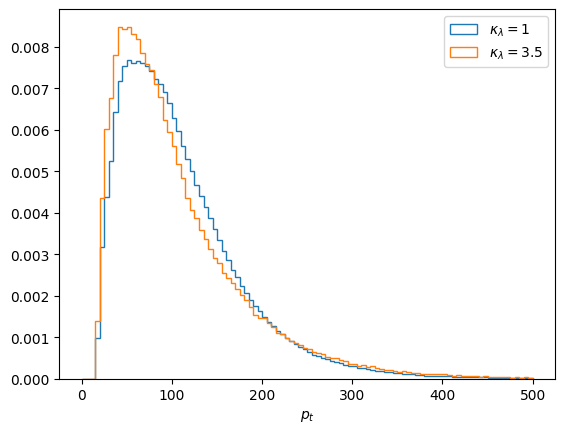

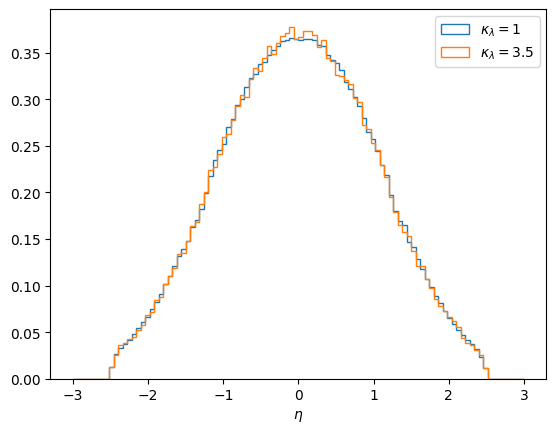

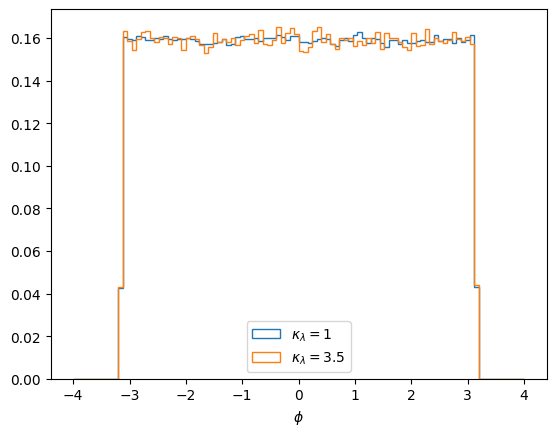

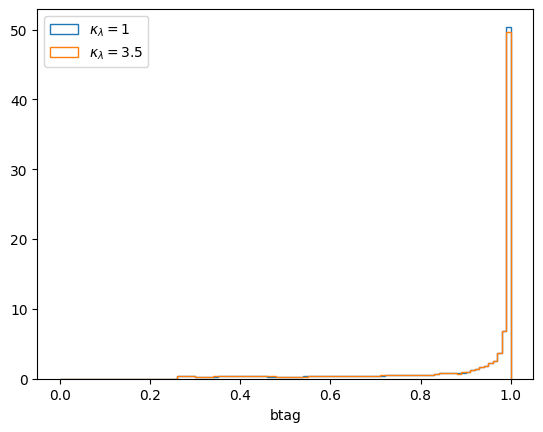

In [8]:
pt_kl3p5_nc=jet_kin_var_kl(df_test_nc,"pt",3.5)
eta_kl3p5_nc=jet_kin_var_kl(df_test_nc,"eta",3.5)
phi_kl3p5_nc=jet_kin_var_kl(df_test_nc,"phi",3.5)
btag_kl3p5_nc=jet_kin_var_kl(df_test_nc,"btag",3.5)

pt_kl3p5=jet_kin_var_kl(df_test,"pt",3.5)
eta_kl3p5=jet_kin_var_kl(df_test,"eta",3.5)
phi_kl3p5=jet_kin_var_kl(df_test,"phi",3.5)
btag_kl3p5=jet_kin_var_kl(df_test,"btag",3.5)


plot_kin_var(pt_kl1_nc,"$\kappa_\lambda=1$",pt_kl3p5_nc,"$\kappa_\lambda=3.5$","pt",100,(0,500))
plot_kin_var(eta_kl1_nc,"$\kappa_\lambda=1$",eta_kl3p5_nc,"$\kappa_\lambda=3.5$","eta",100,(-3,3))
plot_kin_var(phi_kl1_nc,"$\kappa_\lambda=1$",phi_kl3p5_nc,"$\kappa_\lambda=3.5$","phi",100,(-4,4))
plot_kin_var(btag_kl1_nc,"$\kappa_\lambda=1$",btag_kl3p5_nc,"$\kappa_\lambda=3.5$","btag",100,(0,1))

In [9]:
print(phi_kl3p5)

[]
